In [1]:
## Second step goal:
##  Use paper_info to get the subject of each paper
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import math

In [2]:
out_dir = "..\\data\\by_year"
paper_info = pd.read_csv(out_dir+'\\paper_info.csv',index_col = 'id')

In [3]:
paper_info.shape

(2552827, 3)

In [7]:
#### Use each paper's reference to estimate the subject of the paper

def get_subject_num(i):
    ##take in index of paper_info, return 2 digits subject code
    ## if journal has only one subject, return the subject num
    sub_num = [int(s.strip(" [],")) for s in paper_info.iloc[i,2].split(",") if s.strip(" [],") != ""]
    if len(sub_num) == 1:
        return sub_num[0]//100
    else:
        has_ref = False
        subject_list = []
        ref_list = [s.strip(" [],") for s in paper_info.iloc[i,1].split("'") if s.strip(" [],") != ""]
        for ref in ref_list:
            if ref in paper_info.index:
                has_ref = True
                sub_num_list = [int(s.strip(" [],")) for s in paper_info.loc[ref][2].split(",") if s.strip(" [],") != ""]
                subject_list += sub_num 
                count_subject = Counter(np.array(subject_list)//100)
        ## Elements with equal counts are ordered and chose arbitrarily
        if has_ref:
            return count_subject.most_common(1)[0][0]
        else:
            return None
get_subject_num(1)

13

In [9]:
paper_subject = np.zeros(paper_info.shape[0])
for i in range(paper_info.shape[0]):
    if (i+2) % 255280 == 0:
        print(round((i+2)/2552827*100,1),"%")
    paper_subject[i] = get_subject_num(i)

10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100.0 %


In [14]:
# Write
out_dir = "..\\data\\by_year"
paper_subject_match = pd.DataFrame({'id':paper_info.index,'paper_subject':paper_subject})
paper_subject_match.to_csv(out_dir+'\\paper_subject_match.csv',index = False)

In [16]:
# Read 
#paper_subject_match = pd.read_csv(out_dir+'\\paper_subject_match.csv',index_col = 'id')

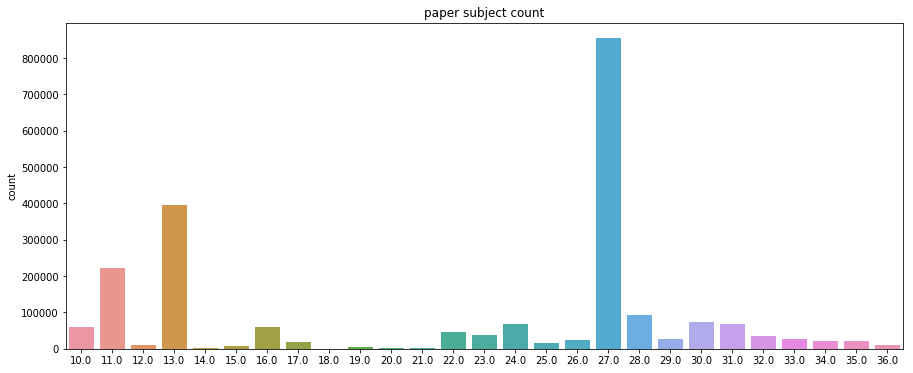

In [17]:
plt.figure(figsize=(15,6))
plt.title("paper subject count")
ax = sns.countplot(x = paper_subject)